In [31]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

import json

import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
with open('config.json') as file:
    config = json.load(file)
    host = config['host']
    database = config['database']
    user = config['user']
    password = config['password']

In [7]:
engine = create_engine(f'postgresql://{user}:{password}@{host}:5432/{database}')

In [8]:
diagnoses = pd.read_sql_table('ed_diagnoses', engine)

In [9]:
diagnoses.head()

,index,HospID,PtID,AdmtID,DxSeq,Dx,DxDesc,DX_CodeType,Diag_Cycle_Code,Padmit,OrigDX
0,0,31608,136474732,190679000162038116,8,Y92254,Theater (live) as place,10,F,N,Y92.254
1,1,27400,136977703,190259000159944083,1,Z3401,"Encntr for suprvsn of normal first preg, first...",10,F,N,Z34.01
2,2,27300,137095813,190569000156954709,5,V635XXA,"Driver of hv veh inj pick-up truck, pk-up/van ...",10,F,N,V63.5XXA
3,3,31608,135946367,190549000142925895,1,S96911A,"Strain of unsp msl/tnd at ank/ft level, right ...",10,F,N,S96.911A
4,4,27150,136346359,190259000142830657,2,N9981,Other intraoperative complications of genitour...,10,F,N,N99.81


In [13]:
alcohol = diagnoses[diagnoses['OrigDX'].str.startswith('F10.')]

In [22]:
alcohol['DxDesc'].unique()

array(['Alcohol dependence w alcoh-induce psychotic disorder, unsp',
       'Alcohol abuse, uncomplicated',
       'Alcohol use, unspecified with intoxication, unspecified',
       'Alcohol dependence w withdrawal with perceptual disturbance',
       'Alcohol dependence with intoxication, uncomplicated',
       'ALCOHOL ABUSE, IN REMISSION',
       'Alcohol dependence with unspecified alcohol-induced disorder',
       'Alcohol dependence with intoxication delirium',
       'Alcohol dependence with intoxication, unspecified',
       'Alcohol dependence with withdrawal, unspecified',
       'Alcohol use, unsp w alcoh-induce psych disorder w hallucin',
       'Alcohol use, unsp with alcohol-induced persisting dementia',
       'Alcohol abuse with intoxication, unspecified',
       'Alcohol dependence with withdrawal, uncomplicated',
       'Alcohol dependence, in remission',
       'Alcohol abuse with intoxication delirium',
       'Alcohol use, unsp with unspecified alcohol-induced disor

In [18]:
pt_length = len(alcohol['PtID'].unique())
dx_length = len(alcohol)

print(f'Patients: {pt_length}\nDiagnoses: {dx_length}')

Patients: 3208
Diagnoses: 4316


In [19]:
alcohol['PtID'].value_counts()

136484003    22
137094851    18
138157666    15
226275261    11
219995077    10
             ..
137116749     1
137114700     1
136303688     1
137172036     1
138017102     1
Name: PtID, Length: 3208, dtype: int64

In [33]:
def generate_stats_by_icd_10_code(icd_10_base):
    df = diagnoses[diagnoses['OrigDX'].str.startswith(icd_10_base)]
    unique_descriptions = df['DxDesc'].unique()
    pt_length = len(df['PtID'].unique())
    dx_length = len(df)
    frequencies_by_patient = df['PtID'].value_counts()
    
    print(unique_descriptions)
    
    plt.hist(frequencies_by_patient)
    plt.show()
    
    return df

['Opioid dependence with withdrawal'
 'Opioid abuse with opioid-induced psychotic disorder, unsp'
 'Opioid abuse with intoxication delirium' 'OPIOID ABUSE, IN REMISSION'
 'Opioid dependence, in remission'
 'Opioid abuse with intoxication, unspecified'
 'Opioid dependence, uncomplicated'
 'Opioid use, unspecified, uncomplicated' 'Opioid abuse, uncomplicated']


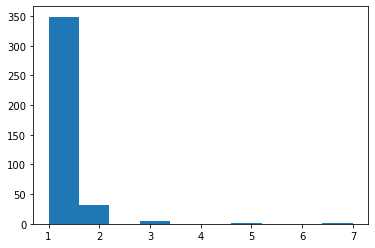

In [35]:
opioids = generate_stats_by_icd_10_code('F11.')

['Nicotine dependence, other tobacco product, uncomplicated'
 'Nicotine dependence, chewing tobacco, uncomplicated'
 'Nicotine dependence, cigarettes, uncomplicated'
 'Nicotine dependence, unspecified, uncomplicated'
 'Nicotine dependence unspecified, with withdrawal'
 'Nicotine dependence, cigarettes, with withdrawal']


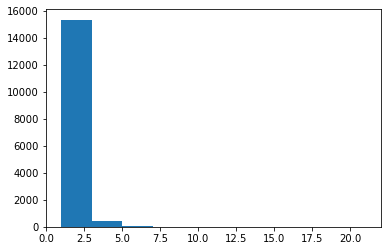

In [36]:
nicotine = generate_stats_by_icd_10_code('F17.')

['Cannabis use, unsp with unsp cannabis-induced disorder'
 'Cannabis use, unspecified with intoxication delirium'
 'Cannabis use, unspecified with intoxication, unspecified'
 'Cannabis abuse with other cannabis-induced disorder'
 'Cannabis abuse, uncomplicated' 'Cannabis dependence, uncomplicated'
 'Cannabis use, unspecified, uncomplicated'
 'Cannabis use, unsp with psychotic disorder, unspecified'
 'Cannabis abuse with intoxication, unspecified'
 'Cannabis dependence with unsp cannabis-induced disorder'
 'Cannabis abuse with cannabis-induced anxiety disorder'
 'Cannabis abuse with unspecified cannabis-induced disorder'
 'Cannabis use, unsp with other cannabis-induced disorder'
 'Cannabis abuse with psychotic disorder, unspecified'
 'CANNABIS ABUSE, IN REMISSION'
 'Cannabis dependence with other cannabis-induced disorder']


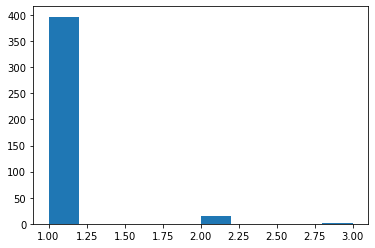

In [37]:
cannabias = generate_stats_by_icd_10_code('F12.')

# Project Ideas
1. Predicting Nicotine/Alcohol/Opioid/Cannabis Use Disorder
1. Predicting Addiction Relapse
2. Predicting Hospice Care
3. Risk Assessment for Alcohol Withdrawal Syndrome
4. Risk of Complication in Surgery
5. Predict Unplanned Surgeries
6. Predicting Length of Stay